In [95]:
import numpy as np
import pandas as pd

In [96]:
df = pd.read_csv('D:\ML\data\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
label_encoder = LabelEncoder()

In [99]:
df['sex']= label_encoder.fit_transform(df['sex'])
df['region']= label_encoder.fit_transform(df['region'])


In [100]:
df.shape

(1338, 7)

In [101]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,3,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,1,10600.54830
1334,18,0,31.920,0,no,0,2205.98080
1335,18,0,36.850,0,no,2,1629.83350
1336,21,0,25.800,0,no,3,2007.94500


In [102]:
X=df[['age','sex','bmi','children','region','charges']]
Y=df[['smoker']]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=12)

In [104]:
X_train.head()

,age,sex,bmi,children,region,charges
646,39,1,26.220,1,1,6123.56880
852,46,0,35.530,0,0,42111.66470
1081,32,1,27.835,1,1,4454.40265
322,34,1,30.800,0,3,35491.64000
368,44,1,32.015,2,1,8116.26885


In [105]:
X_train.shape

(936, 6)

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
X_train

array([[-0.00557145,  0.97467943, -0.75363727, -0.07947937, -0.48302285,
        -0.60279268],
       [ 0.48772736, -1.02597835,  0.77662592, -0.9248509 , -1.39269969,
         2.31644867],
       [-0.49887026,  0.97467943, -0.48818345, -0.07947937, -0.48302285,
        -0.73819019],
       ...,
       [-1.48546788,  0.97467943, -0.12739637, -0.07947937,  0.42665399,
        -0.95996766],
       [ 1.75621002,  0.97467943, -1.15798178, -0.9248509 ,  0.42665399,
         1.08467695],
       [-0.49887026, -1.02597835, -0.17588484, -0.9248509 , -0.48302285,
        -0.74608765]])

In [108]:
X_train.shape

(936, 6)

In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [123]:
knn.fit(X_train,y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [124]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.945273631840796

In [125]:
scores = []

for i in range(1,16):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWa

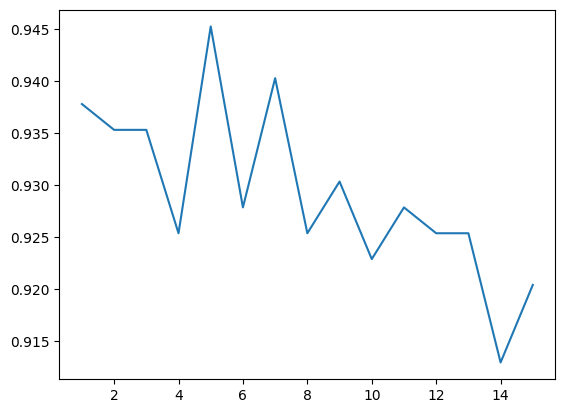

In [121]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
c_m=confusion_matrix(y_test,y_pred)

In [116]:
c_m

array([[320,  11],
       [ 20,  51]], dtype=int64)

In [117]:
from sklearn.metrics import classification_report

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.94      0.97      0.95       331
         yes       0.82      0.72      0.77        71

    accuracy                           0.92       402
   macro avg       0.88      0.84      0.86       402
weighted avg       0.92      0.92      0.92       402

